# 최적화 기초
### << 중요 개념 >>
### 최적화 문제
### 목적 함수, 비용 함수, 손실 함수
### 그리드 서치, 수치적 최적화
### 기울기 필요 조건
### SGD(Steepest Gradient Descent) 방법

# 1. 최적화 문제
### 모수를 입력으로 하고 예측 오차를 출력으로 하는 함수 관계 -> 이 함수를 최소화하는 모수를 찾는 문제
### 목적 함수(Objective function) / 비용 함수(cost function) / 손실 함수(loss function) : 최소화 혹은 최대화 하고자 하는 함수

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def f1(x):
    return (x - 2) ** 2 + 2

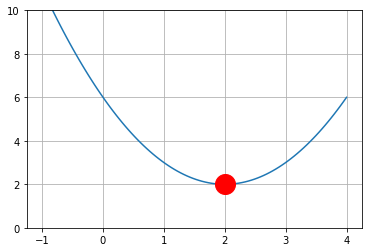

In [9]:
xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=20)
plt.ylim(0, 10)
plt.grid(True)
plt.show()

In [10]:
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

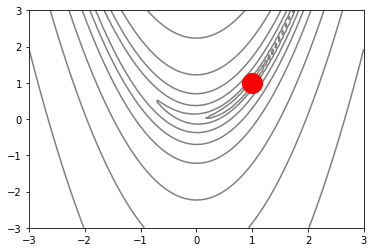

In [11]:
xx = np.linspace(-3, 3, 100)
yy = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.7, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)
plt.show()

## 2. 그리드 서치와 수치적 최적화
### 그리드 서치(grid search) : 가능한 x의 값을 여러개 넣어 보고 그 중 가장 작은 값을 선택하는 방법
### 수치적 최적화(numerical optimization) : 반복적 시행 착오(trial and error)에 의해 최적화 필요조건을 만족하는 값 x를 찾는 방법

### 수치적 최적화 방법은 다음 두 가지 알고리즘을 요구한다.
#### > 어떤 위치  xkxk 를 시도한 뒤, 다음 번에 시도할 위치  xk+1xk+1 을 찾는 알고리즘
#### > 현재 위치  xkxk 가 최적점인지 판단하는 알고리즘

## 3. 기울기 필요 조건

## 4. SGD(Steepest Gradient Descent) 방법
### 현재 위치에서 기울기 값만을 이용하여 다음에 시도할 위치를 알아내는 법

In [13]:
def f1d(x):
    """derivative of f1(x)"""
    return 2 * (x - 2.0)

x = 0, g = -4.0
x = 1.6, g = -0.7999999999999998
x = 1.92, g = -0.16000000000000014


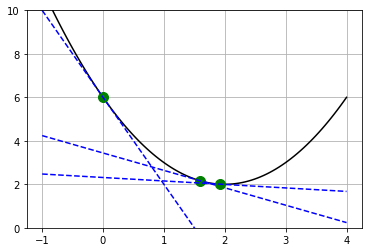

In [15]:
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

#step size
mu = 0.4

# k = 1
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))

# k = 3
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))

plt.ylim(0, 10)
plt.grid(True)
plt.show()

In [16]:
def f2g(x, y):
    """gradient of f2(x)"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

x = (-2, -2), g = [-4806. -1200.]
x = (1.8448000000000002, -1.04), g = [ 3280.47997256  -888.657408  ]
x = (-0.77958397804544122, -0.32907407359999974), g = [-295.69275076 -187.36505049]


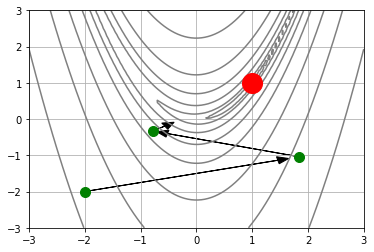

In [17]:
xx = np.linspace(-3, 3, 100)
yy = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.7, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)

# step size
mu = 8e-4
s = 0.9  # for arrowr head drawing

# k = 1
x = -2
y = -2
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, fc='k', ec='k')

# k = 2
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, fc='k', ec='k')

# k = 3
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, fc='k', ec='k')

plt.grid(True)
plt.show()

x = (1.9, 2), g = [ 1225.4  -322. ]
x = (0.91967999999999994, 2.2576000000000001), g = [-519.51817176  282.35773952]
x = (1.3352945374108056, 2.0317138083840001), g = [-132.16574358   49.74046135]
x = (1.4410271322750705, 1.9919214393048221), g = [ 49.66817576 -16.92755133]


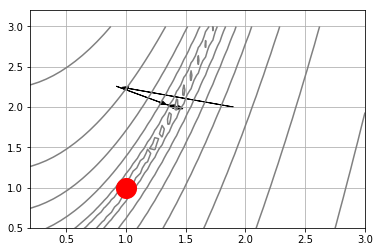

In [18]:
xx = np.linspace(-3, 3, 100)
yy = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.7, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)

# step size
mu = 8e-4
s = 0.9  # for arrowr head drawing

# k = 1
x = 1.9
y = 2
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

# k = 2
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

# k = 3
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

# k = 4
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

plt.xlim(0.2, 3)
plt.ylim(0.5, 3.2)

plt.grid(True)
plt.show()

## 5. 2차 도함수를 사용한 방법
### CG(conjugated gradient) 방법
### BFGS(Broyden–Fletcher–Goldfarb–Shanno) 방법

## 6. SciPy를 이용한 최적화
### SciPy의 optimize 서브 패키지는 최적화 명령 minimize 를 제공한다. 세부적인 알고리즘은 method 인수로 선택할 수 있다. 디폴트 알고리즘은 BFGS 방법이다.

In [23]:
import scipy.optimize as sp

In [26]:
result = sp.minimize(f1, 0)
print(result)
x0 = result['x']
x0

      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 1.99999999])


array([ 1.99999999])

In [27]:
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

In [28]:
result = sp.minimize(f2, (-2, -2))
print(result)
x0 = result['x']
x0

      fun: 5.2112890141803265e-12
 hess_inv: array([[ 0.49938636,  0.99860874],
       [ 0.99860874,  2.00187364]])
      jac: array([  7.32138760e-05,  -3.35902622e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 55
     njev: 131
   status: 2
  success: False
        x: array([ 0.99999854,  0.9999969 ])


array([ 0.99999854,  0.9999969 ])

## 7.전역 최적화 문제
### 최적화 하려는 함수가 복수의 국소 최저점(local minima)을 가지고 있는 경우에는 수치적 최적화 방법으로 전역 최저점(global minimum)에 도달한다는 보장이 없다. 결과는 초기 추정값 및 알고리즘, 파라미터 등에 의존

In [29]:
def f_global(x):
    return x**2 + 10 * np.sin(x)

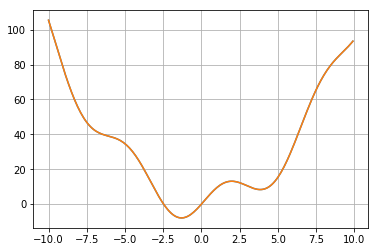

In [31]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f_global(x));
plt.grid(True)
plt.show()

In [32]:
result = sp.minimize(f_global, 4)
print(result)
x0 = result['x']
x0

      fun: 8.315585579478032
 hess_inv: array([[ 0.118692]])
      jac: array([  3.09944153e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 3.83746748])


array([ 3.83746748])

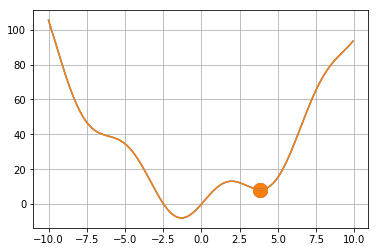

In [34]:
plt.plot(x, f_global(x))
plt.scatter(x0, f_global(x0), s=200)
plt.grid(True)
plt.show()

# 제한 조건이 있는 최적화
### << 중요 개념 >>
### 등식 제한 조건이 있는 최적화 문제
### 라그랑주 승수법
### 부등식 제한 조건이 있는 최적화 문제
### KKT 조건

## 등식 제한 조건이 있는 최적화 
## => 라그랑주 승수법(Lagrange multiplier)
### SciPy의 optimize 서브패키지에서 fmin_slsqp

In [35]:
def f2logs(x):
    return np.log(x[0]) + np.log(x[1])

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.fmin_slsqp(f2logs, np.array([1,1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.38629436112
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([ 0.5,  0.5])

## 부등식 제한 조건이 있는 최적화
## KKT(Karush-Kuhn-Tucker) 조건
### >> 최적화 결과에 전혀 영향을 주지 않는 쓸모없는 제한 조건
### >> 최적화 결과에 영향을 주는 등식 제한 조건

In [37]:
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

def ieq_constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

sp.fmin_slsqp(f, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.47487373504
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


array([ 1.25004693,  0.24995307])